## Loading required libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.api import OLS

## Importing the dataset

In [4]:
boston_df = pd.read_csv('../Datasets/boston_house_prices.csv')

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Select the target and explanatory variables

In [5]:
# Rooms vs Median Value

X = boston_df[['RM']]
y = boston_df['MEDV']

## Splitting the data into test and training data set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training Linear regression model

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     RM   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Wed, 25 Dec 2024   Prob (F-statistic):                   3.74e-256
Time:                        19:40:04   Log-Likelihood:                         -1065.2
No. Observations:                 506   AIC:                                      2132.
Df Residuals:                     505   BIC:                                      2137.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MEDV           0.2467      0.004     67.930      0.000       0.240       0.254
==============================================================================
Omnibus:                       82.770   Durbin-Watson:                   0.430
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.829
Skew:                          -0.931   Prob(JB):                     5.34e-35
Kurtosis:                       5.004   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Visualise Regression Line

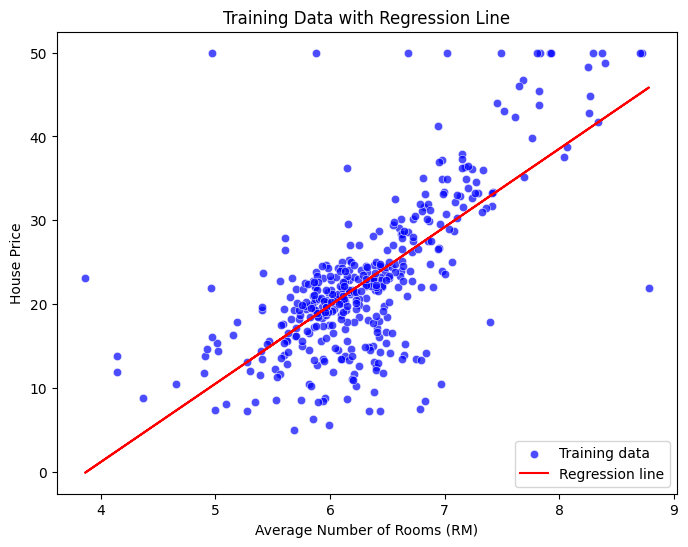

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train['RM'], y=y_train, color='blue', alpha=0.7, label='Training data')
plt.plot(X_train['RM'], model.predict(X_train), color='red', label='Regression line')
plt.title("Training Data with Regression Line")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("House Price")
plt.legend()
plt.show()


## Predicting on test data

In [15]:
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 46.14
R-squared (R2): 0.37


## Model diagnostics 

In [17]:
residuals = y_test - y_pred

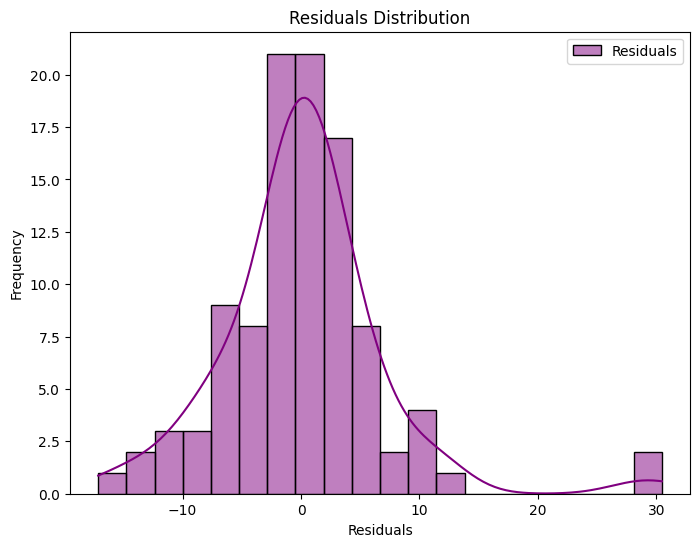

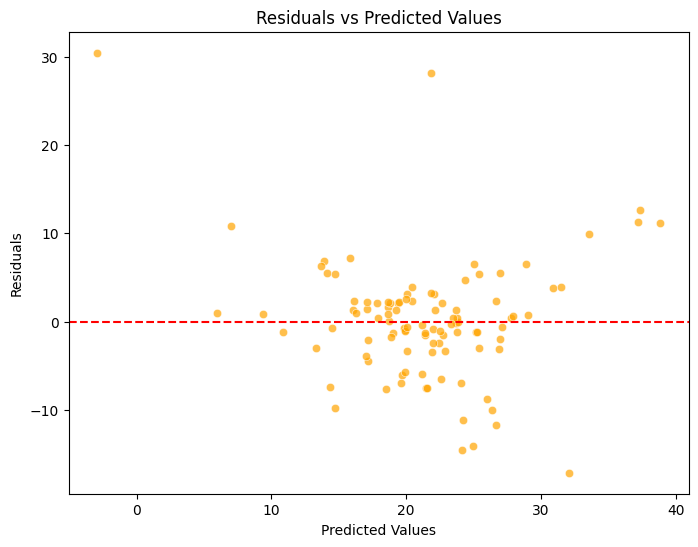

In [18]:
# Plot residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple', bins=20, label='Residuals')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Scatter plot of residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


### Deliverables
 - Coefficients of the regression model.
 - Scatter plot of training data with regression line.
 - Model evaluation metrics (MSE, R-squared).
 - Residual diagnostics plots.